In [1]:
import re

from collections import defaultdict
from conceptnet import ConceptNet
from dbpedia import DBPedia
import utils

wrap_cn = ConceptNet()
wrap_db = DBPedia()
huric_utils = utils.HuricUtils()
language_utils = utils.LanguageUtils('en')
graph_utils = utils.GraphUtils()

def snake_to_camel(text):
    return ''.join(x.capitalize() or '_' for x in text.split('_'))

In [2]:
frame_elements = huric_utils.get_frame_elements_values('Theme')
frame_lemmas = set()
for el in frame_elements:
    lemma = language_utils.semantic_head_lemmatize(el)
    #print(el, ':', lemma)
    frame_lemmas.add(lemma)
frame_lemmas = sorted(frame_lemmas)

apple {('Pome', 'Fruit', 'IsA'), ('Fruit', 'ReproductiveStructure', 'IsA'), ('Fruit', 'Consequence', 'IsA'), ('Apple', 'Pome', 'IsA'), ('Apple', 'AppleTree', 'IsA')} {('Plant', 'Species', 'rdf:type'), ('Apple', 'Eukaryote', 'rdf:type'), ('Plant', 'Eukaryote', 'rdf:type'), ('Apple', 'Tree', 'hypernym'), ('Apple', 'Species', 'rdf:type'), ('Tree', 'Plant', 'hypernym'), ('Plant', 'Eukaryote', 'rdfs:subClassOf'), ('Plant', 'Eukaryotes', 'hypernym'), ('Apple', 'Plant', 'rdf:type'), ('Eukaryote', 'Species', 'rdfs:subClassOf'), ('Tree', 'Plant', 'rdf:type')} set()
aspirin {('Salt', 'Flavorer', 'IsA'), ('NonsteroidalAntiInflammatory', 'AntiInflammatory', 'IsA'), ('Salt', 'Compound', 'IsA'), ('Salt', 'Taste', 'IsA'), ('Salicylate', 'NonsteroidalAntiInflammatory', 'IsA'), ('Salicylate', 'Salt', 'IsA'), ('Aspirin', 'Salicylate', 'IsA')} {('Aspirin', 'Medication', 'hypernym'), ('Aspirin', 'ChemicalSubstance', 'rdf:type'), ('Drug', 'ChemicalSubstance', 'rdfs:subClassOf'), ('Aspirin', 'Drug', 'rdf:ty

bread {('Food', 'Substance', 'IsA'), ('Food', 'Content', 'IsA'), ('Bread', 'Starches', 'IsA'), ('BakedGoods', 'Food', 'IsA'), ('Bread', 'BakedGoods', 'IsA'), ('Food', 'Solid', 'IsA'), ('Starches', 'Foodstuff', 'IsA')} {('Bread', 'Food', 'rdf:type'), ('Bread', 'Food', 'hypernym')} {'Food'}
can {('Instrumentality', 'Unit', 'IsA'), ('Can', 'Containerful', 'IsA'), ('Instrumentality', 'Utility', 'IsA'), ('Container', 'Instrumentality', 'IsA'), ('Can', 'Container', 'IsA'), ('Buoy', 'ReferencePoint', 'IsA'), ('Containerful', 'IndefiniteQuantity', 'IsA'), ('ReferencePoint', 'Indicator', 'IsA'), ('IndefiniteQuantity', 'Measure', 'IsA'), ('Can', 'Buoy', 'IsA')} set() set()
catalogue set() set() set()
cellphone set() {('Telephone', 'Device', 'hypernym'), ('Organisation', 'Agent', 'rdfs:subClassOf'), ('Company', 'Organisation', 'rdfs:subClassOf'), ('Telephone', 'Device', 'rdf:type'), ('Mobile_phone', 'Company', 'rdf:type'), ('Mobile_phone', 'Telephone', 'hypernym')} set()
cereal {('Grass', 'Gramin

cushion {('Structure', 'Cognition', 'IsA'), ('Cushion', 'Padding', 'IsA'), ('Hen', 'Chicken', 'IsA'), ('Hen', 'Female', 'IsA'), ('Layer', 'Structure', 'IsA'), ('Layer', 'Region', 'IsA'), ('Cushion', 'Layer', 'IsA'), ('Hen', 'Bird', 'IsA'), ('Artifact', 'Whole', 'IsA'), ('Layer', 'Hen', 'IsA'), ('Structure', 'Constitution', 'IsA'), ('Region', 'Location', 'IsA'), ('Structure', 'BodyPart', 'IsA'), ('Layer', 'Artifact', 'IsA'), ('Region', 'IndefiniteQuantity', 'IsA')} {('Software', 'Work', 'rdfs:subClassOf'), ('Bag', 'Software', 'rdf:type'), ('Bag', 'Tool', 'hypernym'), ('Cushion', 'Bag', 'hypernym')} set()
detergent {('Detergent', 'CleansingAgent', 'IsA'), ('Detergent', 'WettingAgent', 'IsA'), ('Formulation', 'ExpressiveStyle', 'IsA'), ('CleansingAgent', 'Formulation', 'IsA'), ('Formulation', 'Compound', 'IsA'), ('WettingAgent', 'ChemicalAgent', 'IsA'), ('ChemicalAgent', 'Agent', 'IsA')} {('Surfactant', 'Compounds', 'hypernym'), ('Detergent', 'ChemicalCompound', 'rdf:type'), ('Surfactant'

kettle {('Kettle', 'Containerful', 'IsA'), ('Containerful', 'IndefiniteQuantity', 'IsA'), ('PercussionInstrument', 'MusicalInstrument', 'IsA'), ('IndefiniteQuantity', 'Measure', 'IsA'), ('MusicalInstrument', 'Device', 'IsA'), ('Kettle', 'PercussionInstrument', 'IsA')} {('Kettle', 'Pot', 'hypernym'), ('Kettle', 'Beverage', 'rdf:type'), ('Beverage', 'Food', 'rdfs:subClassOf')} set()
knife {('Cutter', 'Diner', 'IsA'), ('Knife', 'EdgeTool', 'IsA'), ('Weapon', 'Persuasion', 'IsA'), ('Instrument', 'Assistant', 'IsA'), ('Knife', 'Weapon', 'IsA'), ('EdgeTool', 'Cutter', 'IsA'), ('Weapon', 'Instrument', 'IsA'), ('Persuasion', 'Communication', 'IsA'), ('Cutter', 'SkilledWorker', 'IsA'), ('Instrument', 'Means', 'IsA')} {('Software', 'Work', 'rdfs:subClassOf'), ('Knife', 'Software', 'rdf:type'), ('Knife', 'Tool', 'hypernym')} set()
lanyard {('Mark', 'Impression', 'IsA'), ('Mark', 'WrittenSymbol', 'IsA'), ('Carrier', 'Organism', 'IsA'), ('Merchandise', 'Commodity', 'IsA'), ('Carrier', 'Chemical', '

newspaper {('Push', 'Progress', 'IsA'), ('Consequence', 'Result', 'IsA'), ('Press', 'Machine', 'IsA'), ('Press', 'Clamp', 'IsA'), ('Machine', 'MechanicalDevice', 'IsA'), ('Medium', 'Transmission', 'IsA'), ('Material', 'Information', 'IsA'), ('Product', 'Creation', 'IsA'), ('Professional', 'Adult', 'IsA'), ('Paper', 'Material', 'IsA'), ('Machine', 'Device', 'IsA'), ('Estate', 'RealProperty', 'IsA'), ('Clamp', 'HoldingDevice', 'IsA'), ('Owner', 'Person', 'IsA'), ('Press', 'Weightlifting', 'IsA'), ('Estate', 'Class', 'IsA'), ('Paper', 'Article', 'IsA'), ('Creation', 'Activity', 'IsA'), ('Product', 'Chemical', 'IsA'), ('Medium', 'State', 'IsA'), ('Machine', 'Organization', 'IsA'), ('Firm', 'Business', 'IsA'), ('Quantity', 'Concept', 'IsA'), ('Press', 'PrintMedia', 'IsA'), ('Consequence', 'Phenomenon', 'IsA'), ('Creation', 'Beginning', 'IsA'), ('Professional', 'Athlete', 'IsA'), ('Material', 'Applicant', 'IsA'), ('Publisher', 'Owner', 'IsA'), ('Newspaper', 'Product', 'IsA'), ('Press', 'Esta

phone {('Part', 'Tune', 'IsA'), ('Part', 'Object', 'IsA'), ('Part', 'Line', 'IsA'), ('Part', 'Concern', 'IsA'), ('Part', 'Thing', 'IsA'), ('Phone', 'LanguageUnit', 'IsA'), ('LanguageUnit', 'Part', 'IsA'), ('Part', 'Relation', 'IsA'), ('Part', 'Concept', 'IsA')} {('Telephone', 'Device', 'hypernym'), ('Telephone', 'Device', 'rdf:type')} set()
pillow {('Cushion', 'Padding', 'IsA'), ('Pillow', 'Cushion', 'IsA'), ('Layer', 'Structure', 'IsA'), ('Layer', 'Region', 'IsA'), ('Cushion', 'Layer', 'IsA'), ('Layer', 'Hen', 'IsA'), ('Layer', 'Artifact', 'IsA')} {('Pillow', 'Organisation', 'rdf:type'), ('Pillow', 'Support', 'hypernym'), ('Organisation', 'Agent', 'rdfs:subClassOf')} set()
plate {('Course', 'Education', 'IsA'), ('Container', 'Instrumentality', 'IsA'), ('Anode', 'Electrode', 'IsA'), ('Receptacle', 'PlantPart', 'IsA'), ('CutOfBeef', 'Cut', 'IsA'), ('Line', 'Location', 'IsA'), ('Support', 'Influence', 'IsA'), ('Structure', 'Cognition', 'IsA'), ('Entree', 'Right', 'IsA'), ('Crust', 'Cover

remote set() set() set()
roll {('Film', 'PhotographicPaper', 'IsA'), ('Walk', 'Travel', 'IsA'), ('Force', 'PhysicalPhenomenon', 'IsA'), ('Solid', 'Substance', 'IsA'), ('Roll', 'Gait', 'IsA'), ('Sheet', 'Paper', 'IsA'), ('Propulsion', 'Force', 'IsA'), ('Locomotion', 'Mobility', 'IsA'), ('Act', 'Expression', 'IsA'), ('Database', 'Information', 'IsA'), ('Object', 'Constituent', 'IsA'), ('Object', 'PhysicalEntity', 'IsA'), ('Medium', 'Transmission', 'IsA'), ('Roll', 'Propulsion', 'IsA'), ('FlightManeuver', 'Maneuver', 'IsA'), ('Solid', 'Shape', 'IsA'), ('Propulsion', 'Act', 'IsA'), ('Film', 'Object', 'IsA'), ('Roll', 'Film', 'IsA'), ('Act', 'LegalDocument', 'IsA'), ('Gait', 'Walk', 'IsA'), ('Solid', 'StateOfMatter', 'IsA'), ('Cylinder', 'Container', 'IsA'), ('Act', 'Performance', 'IsA'), ('Chamber', 'Cavity', 'IsA'), ('Object', 'ComputerScience', 'IsA'), ('Medium', 'State', 'IsA'), ('Walk', 'Carriage', 'IsA'), ('List', 'Database', 'IsA'), ('Maneuver', 'Evasion', 'IsA'), ('Film', 'Wrapping'

towel {('PieceOfCloth', 'Fabric', 'IsA'), ('Fabric', 'Artifact', 'IsA'), ('Towel', 'PieceOfCloth', 'IsA')} {('Towel', 'Piece', 'hypernym'), ('MusicalWork', 'Work', 'rdfs:subClassOf'), ('Towel', 'MusicalWork', 'rdf:type')} set()
trash {('Rabble', 'Folk', 'IsA'), ('Trash', 'Rabble', 'IsA'), ('Folk', 'People', 'IsA')} set() set()
tray {('Tray', 'Receptacle', 'IsA'), ('Receptacle', 'Fitting', 'IsA'), ('Receptacle', 'Container', 'IsA'), ('Container', 'Instrumentality', 'IsA'), ('Receptacle', 'PlantPart', 'IsA'), ('Fitting', 'Test', 'IsA'), ('PlantPart', 'NaturalObject', 'IsA'), ('Fitting', 'Accessory', 'IsA')} {('Tray', 'Company', 'rdf:type'), ('Company', 'Organisation', 'rdfs:subClassOf'), ('Organisation', 'Agent', 'rdfs:subClassOf'), ('Tray', 'Platform', 'hypernym')} set()
trouser {('Garment', 'Clothing', 'IsA'), ('Trouser', 'Garment', 'IsA'), ('Clothing', 'ConsumerGoods', 'IsA')} {('Trousers', 'Food', 'rdf:type'), ('Trousers', 'Item', 'hypernym')} set()
tub {('Craft', 'Class', 'IsA'), ('

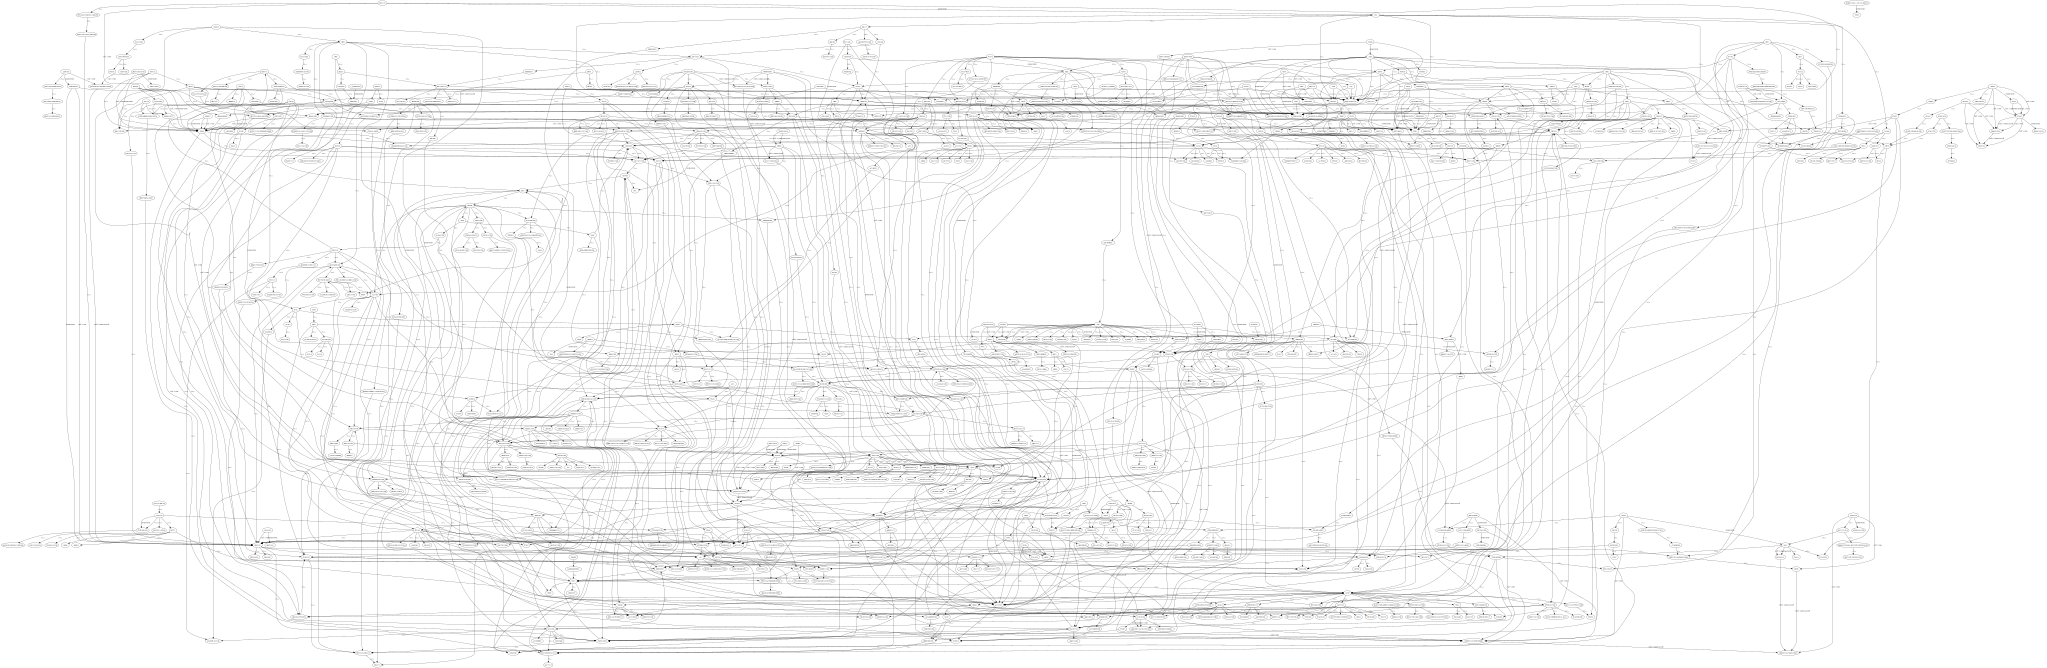

In [3]:
all_hypernyms = defaultdict(lambda: 0)
both_hypernyms = defaultdict(lambda: 0)
all_edges = set()
#both_edges = set()
for w in frame_lemmas:
    id_cn = wrap_cn.get_id(w)
    hypernyms_cn, edges_cn = wrap_cn.get_isa_tree(id_cn, max_steps=3)
    hypernyms_cn = set([snake_to_camel(wrap_cn.get_name(el)) for el in hypernyms_cn])
    edges_cn = graph_utils.edges_name_normalize(edges_cn, lambda a: snake_to_camel(wrap_cn.get_name(a)))
    id_db = wrap_db.get_id(w)
    hypernyms_db, edges_db = wrap_db.get_all_types(id_db)
    hypernyms_db = set([wrap_db.get_name(el) for el in hypernyms_db])
    edges_db = graph_utils.edges_name_normalize(edges_db, wrap_db.get_name)
    hypernyms = hypernyms_cn.union(hypernyms_db)
    hypernyms_both = hypernyms_cn & hypernyms_db
    edges = edges_cn.union(edges_db)
    #edges_both = set([(e1[0], e1[1], '+'.join(e1[2], e2[2])) for e1 in edges_cn for e2 in edges_db if (e1[0] == e2[0] and e1[1] == e2[1])]) #edges_cn & edges_db
    for h in hypernyms:
        all_hypernyms[h] += 1
    for h in hypernyms_both:
        both_hypernyms[h] +=1
    print(w, edges_cn, edges_db, hypernyms_both)
    all_edges.update(edges)
    #both_edges.update(edges_both)

graph_utils.create_graph(all_edges)

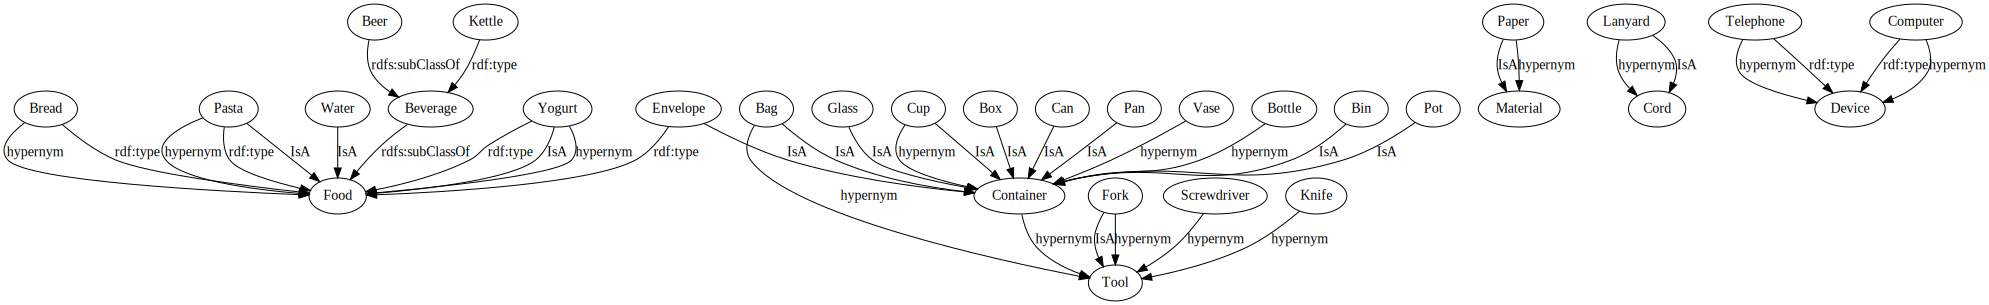

In [4]:
#graph_utils.create_graph(both_edges)
# the graph with edges that belong to both the sets of hypernyms
initial_nodes = [snake_to_camel(el) for el in frame_lemmas]
edges_with_nodes_both = set([e for e in all_edges if (e[0] in initial_nodes + list(both_hypernyms) and e[1] in both_hypernyms)])
graph_utils.create_graph(edges_with_nodes_both)

In [5]:
me = language_utils.semantic_head_lemmatize('me')
id_cn = wrap_cn.get_id(me)
id_db = wrap_db.get_id(me)
print(me, id_cn, id_db)
h_cn, e_cn = wrap_cn.get_isa_tree(id_cn, 5)
h_cn = set([snake_to_camel(wrap_cn.get_name(el)) for el in h_cn])
h_db, e_db = wrap_db.get_all_types(id_db)
h_db = set([wrap_db.get_name(el) for el in h_db])
print(h_cn, h_db)
h_both = hypernyms_cn & hypernyms_db

person /c/en/person http://dbpedia.org/ontology/Person
{'Gathering', 'Memory', 'Plan', 'SocialStation', 'Theorization', 'Service', 'Group', 'LinearUnit', 'ElectronicEquipment', 'Union', 'ComputerScience', 'Cognition', 'Facility', 'Set', 'Descent', 'Prayer', 'BodyPart', 'CognitiveState', 'Thing', 'Person', 'Exercise', 'PsychologicalFeature', 'Removal', 'Object', 'Line', 'Collection', 'Abstraction', 'Idea', 'Connection', 'Act', 'SacredText', 'Substance', 'PlanOfAction', 'Method', 'PhysicalEntity', 'Body', 'BiologicalGroup', 'Request', 'Class', 'Tune', 'Organism', 'Religionist', 'KnowHow', 'Message', 'GrammaticalCategory', 'Beginning', 'Placement', 'Concern', 'Instrumentality', 'Healing', 'Property', 'Painting', 'CausalAgent', 'Degree', 'SocialGroup', 'Ability', 'UnitOfMeasurement', 'Constitution', 'Quality', 'Device', 'Drawing', 'Association', 'System', 'State', 'TaxonomicGroup', 'HumanBody', 'People', 'Publication', 'Happening', 'Artifact', 'Constituent', 'FundamentalQuantity', 'Utility

In [6]:
graph_utils.get_roots(edges_with_nodes_both)

['Food', 'Material', 'Tool', 'Cord', 'Device']